# Principal Component Analysis with Cancer Data

In [271]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

 #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)


# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [272]:
columns = ['ID', 'Clump_thickness','Uniform_cell_sz', 'Uniform_cell_shape', 'Adhesion','Epi_Cell_sz','Bare_Nuclei','Bland_chromatin','Norm_Nuclei','Mitosis','Class']
cancer_df = pd.read_table('breast-cancer-wisconsin.data.txt',',',names=columns)

In [273]:
cancer_df.head(10)

,ID,Clump_thickness,Uniform_cell_sz,Uniform_cell_shape,Adhesion,Epi_Cell_sz,Bare_Nuclei,Bland_chromatin,Norm_Nuclei,Mitosis,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [274]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [275]:
cancer_df.dtypes

ID                     int64
Clump_thickness        int64
Uniform_cell_sz        int64
Uniform_cell_shape     int64
Adhesion               int64
Epi_Cell_sz            int64
Bare_Nuclei           object
Bland_chromatin        int64
Norm_Nuclei            int64
Mitosis                int64
Class                  int64
dtype: object

In [276]:
cancer_df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [277]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                    699 non-null int64
Clump_thickness       699 non-null int64
Uniform_cell_sz       699 non-null int64
Uniform_cell_shape    699 non-null int64
Adhesion              699 non-null int64
Epi_Cell_sz           699 non-null int64
Bare_Nuclei           699 non-null object
Bland_chromatin       699 non-null int64
Norm_Nuclei           699 non-null int64
Mitosis               699 non-null int64
Class                 699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [278]:
#bare nuclei is object type so check if there is some other character in that column.
cancer_df.loc[cancer_df['Bare_Nuclei'] == '?','Bare_Nuclei']= 0
cancer_df['Bare_Nuclei'] = cancer_df['Bare_Nuclei'].astype(int)

In [279]:
cancer_df.replace(0, cancer_df['Bare_Nuclei'].median(), inplace = True)


In [280]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [281]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


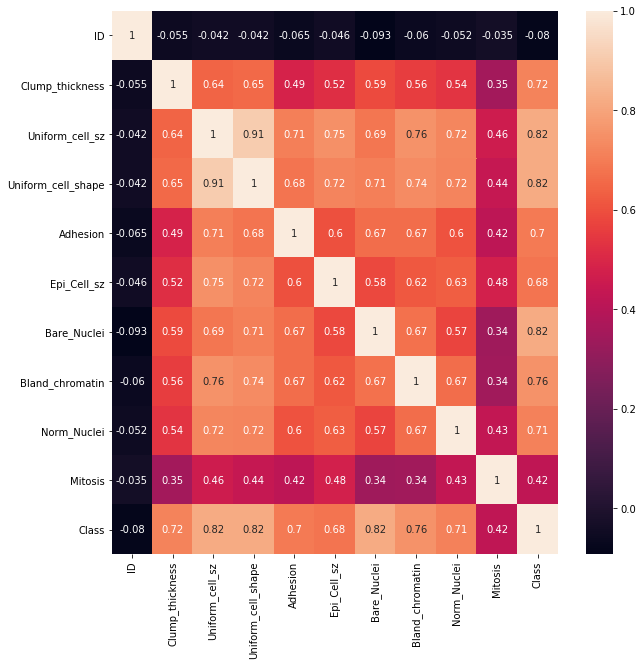

In [282]:
# Check for correlation of variable
plt.subplots(figsize=(10,10))
sns.heatmap(cancer_df.corr(), annot=True)

In [283]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [284]:
#Let us check for pair plots

In [285]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [286]:
# We could see most of the outliers are now removed.
#dropping id
cancer_df.drop('ID',axis=1, inplace=True)

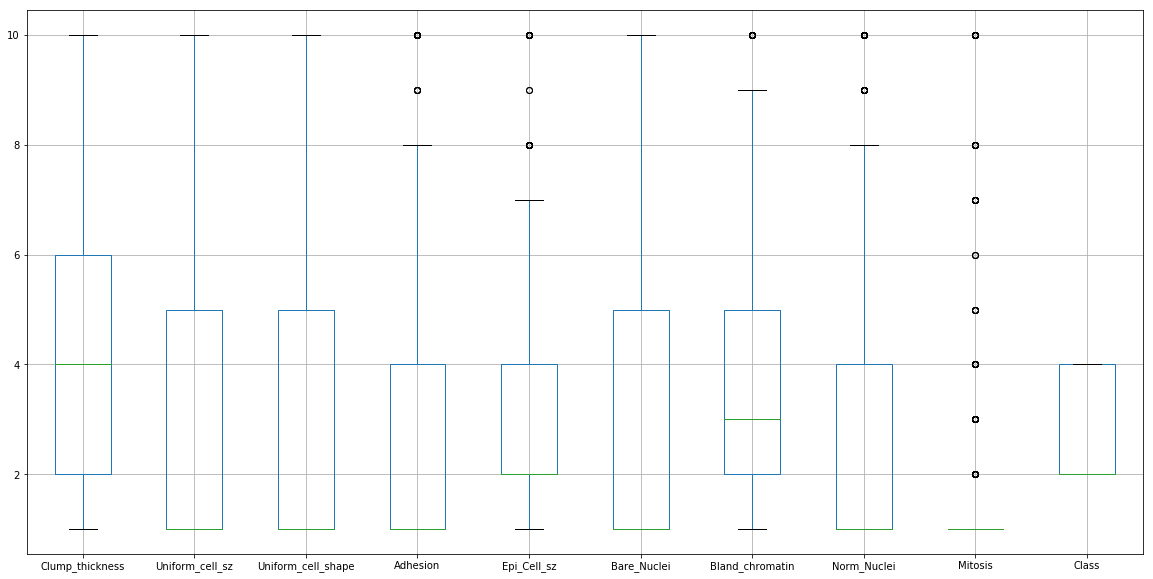

In [287]:
plt.subplots(figsize=(20,10))
cancer_df.boxplot()

In [288]:
cancer_df.groupby('Mitosis').count()

,Clump_thickness,Uniform_cell_sz,Uniform_cell_shape,Adhesion,Epi_Cell_sz,Bare_Nuclei,Bland_chromatin,Norm_Nuclei,Class
Mitosis,,,,,,,,,
1,579,579,579,579,579,579,579,579,579
2,35,35,35,35,35,35,35,35,35
3,33,33,33,33,33,33,33,33,33
4,12,12,12,12,12,12,12,12,12
5,6,6,6,6,6,6,6,6,6
6,3,3,3,3,3,3,3,3,3
7,9,9,9,9,9,9,9,9,9
8,8,8,8,8,8,8,8,8,8
10,14,14,14,14,14,14,14,14,14


In [289]:
cancer_df.describe()

,Clump_thickness,Uniform_cell_sz,Uniform_cell_shape,Adhesion,Epi_Cell_sz,Bare_Nuclei,Bland_chromatin,Norm_Nuclei,Mitosis,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [290]:
IQR1 = cancer_df.quantile(0.25)
IQR3 = cancer_df.quantile(0.75)
IQR = IQR3 - IQR1
Max_cap = IQR3+ 1.5*IQR
Min_cap = IQR1 - 1.5*IQR
cancer_df[((cancer_df>Max_cap) | (cancer_df<Min_cap))] = np.nan



In [291]:
cancer_df.head(20)

,Clump_thickness,Uniform_cell_sz,Uniform_cell_shape,Adhesion,Epi_Cell_sz,Bare_Nuclei,Bland_chromatin,Norm_Nuclei,Mitosis,Class
0,5,1,1,1.0,2.0,1,3.0,1.0,1.0,2
1,5,4,4,5.0,7.0,10,3.0,2.0,1.0,2
2,3,1,1,1.0,2.0,2,3.0,1.0,1.0,2
3,6,8,8,1.0,3.0,4,3.0,7.0,1.0,2
4,4,1,1,3.0,2.0,1,3.0,1.0,1.0,2
5,8,10,10,8.0,7.0,10,9.0,7.0,1.0,4
6,1,1,1,1.0,2.0,10,3.0,1.0,1.0,2
7,2,1,2,1.0,2.0,1,3.0,1.0,1.0,2
8,2,1,1,1.0,2.0,1,1.0,1.0,NaN,2
9,4,2,1,1.0,2.0,1,2.0,1.0,1.0,2


In [292]:
for i in cancer_df.columns:
    cancer_df.replace(np.nan, cancer_df[i].median(), inplace = True)
cancer_df.head(20)
    

,Clump_thickness,Uniform_cell_sz,Uniform_cell_shape,Adhesion,Epi_Cell_sz,Bare_Nuclei,Bland_chromatin,Norm_Nuclei,Mitosis,Class
0,5,1,1,1.0,2.0,1,3.0,1.0,1.0,2
1,5,4,4,5.0,7.0,10,3.0,2.0,1.0,2
2,3,1,1,1.0,2.0,2,3.0,1.0,1.0,2
3,6,8,8,1.0,3.0,4,3.0,7.0,1.0,2
4,4,1,1,3.0,2.0,1,3.0,1.0,1.0,2
5,8,10,10,8.0,7.0,10,9.0,7.0,1.0,4
6,1,1,1,1.0,2.0,10,3.0,1.0,1.0,2
7,2,1,2,1.0,2.0,1,3.0,1.0,1.0,2
8,2,1,1,1.0,2.0,1,1.0,1.0,4.0,2
9,4,2,1,1.0,2.0,1,2.0,1.0,1.0,2


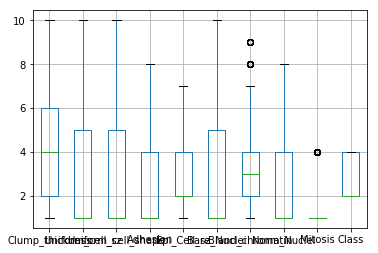

In [293]:
cancer_df.boxplot()

Now we can see that outliers are reduced to a great extent.

# Q6 Create a covariance matrix for identifying Principal components

In [308]:
# Before i go with PCA, going to drop target variable "Class" from dataset. 
cancer_df_X = cancer_df.drop(['Class'], axis=1)

In [295]:
# PCA
# Step 1 - Create covariance matrix


In [309]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cancer_df_std =  sc.fit_transform(cancer_df_X)          
c = np.cov(cancer_df_std.T)
print('Covariance Matrix \n%s', c)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.49147616 0.53729985 0.5908535
  0.55384769 0.51735367 0.44270396]
 [0.64583645 1.00143266 0.90818117 0.68637009 0.73765434 0.68765657
  0.69920182 0.65617015 0.49446483]
 [0.65552689 0.90818117 1.00143266 0.65424809 0.71479919 0.70848734
  0.68279618 0.63766582 0.46579632]
 [0.49147616 0.68637009 0.65424809 1.00143266 0.64343778 0.64477106
  0.6450468  0.58363679 0.38151349]
 [0.53729985 0.73765434 0.71479919 0.64343778 1.00143266 0.62356323
  0.61451808 0.62132618 0.43472435]
 [0.5908535  0.68765657 0.70848734 0.64477106 0.62356323 1.00143266
  0.67641014 0.58773705 0.4667265 ]
 [0.55384769 0.69920182 0.68279618 0.6450468  0.61451808 0.67641014
  1.00143266 0.60732066 0.39331331]
 [0.51735367 0.65617015 0.63766582 0.58363679 0.62132618 0.58773705
  0.60732066 1.00143266 0.45654168]
 [0.44270396 0.49446483 0.46579632 0.38151349 0.43472435 0.4667265
  0.39331331 0.45654168 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [297]:
# Step 2- Get eigen values and eigen vector

In [311]:
eign_val, eign_vct = np.linalg.eig(c)
print('Eigenvalues \n%s' %eign_val)
print('\nEigenvectors \n%s' %eign_vct)

Eigenvalues 
[5.84824459 0.7127478  0.08877737 0.53285716 0.34883656 0.30496581
 0.31648931 0.42083397 0.43914141]

Eigenvectors 
[[-0.30952241 -0.17476172  0.01440884  0.77910194 -0.41642409  0.16954077
   0.062381   -0.24495765 -0.01995089]
 [-0.3762872   0.07494546  0.72327785  0.10846459  0.24365085 -0.28120098
   0.21358085  0.27475676 -0.24155315]
 [-0.37160913  0.09096391 -0.68002207  0.19534088  0.30190595 -0.36301251
   0.10243957  0.26559878 -0.22154523]
 [-0.32947254  0.2801208  -0.05685212 -0.33774309 -0.66434773 -0.17711672
   0.30117505  0.19753312  0.30532546]
 [-0.34110798  0.12485947 -0.03259019 -0.18461987 -0.11028723  0.64119218
  -0.3607498   0.32611524 -0.41608483]
 [-0.34364737  0.04240944  0.08560141  0.04333717  0.1117659  -0.22313327
  -0.73781048 -0.02729669  0.5133349 ]
 [-0.33791576  0.22183165 -0.03358142 -0.0494936   0.45427961  0.47108776
   0.39251983 -0.27120762  0.42084119]
 [-0.32382739 -0.02286789 -0.00851064 -0.35479695 -0.05385473 -0.20861701
  -0.

# Q8 Find variance and cumulative variance by each eigen vector

In [312]:
tot = sum(eign_val)
var_exp = [( i /tot ) * 100 for i in sorted(eign_val, reverse=True)]
print( "Variance Explained", var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\nCumulative Variance Explained", cum_var_exp)

Variance Explained [64.88753337684766, 7.908090377270412, 5.912164933169896, 4.872368560924481, 4.6692435558617, 3.870416803497459, 3.511517084079284, 3.383661300048551, 0.9850040083005545]

Cumulative Variance Explained [ 64.88753338  72.79562375  78.70778869  83.58015725  88.2494008
  92.11981761  95.63133469  99.01499599 100.        ]


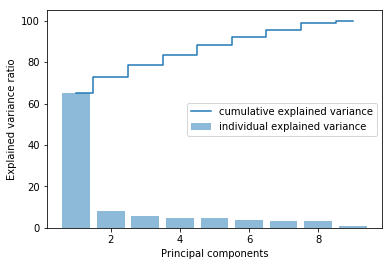

In [313]:
plt.bar(range(1,eign_val.size+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,eign_val.size+1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [314]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(cancer_df_X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Q10 Find correlation between components and features

In [315]:
pca.components_

array([[ 0.34659947,  0.44960746,  0.4378772 ,  0.23512728,  0.17509922,
         0.50947176,  0.27905348,  0.22957341,  0.09952206],
       [ 0.33529467,  0.36569824,  0.31026934, -0.05054918,  0.0544258 ,
        -0.80389987, -0.05888437,  0.04724407,  0.01017153],
       [ 0.86563778, -0.3168555 , -0.24656933, -0.18984419, -0.10594189,
         0.12863218, -0.11010098, -0.10951896,  0.03937038],
       [ 0.06774862, -0.230669  , -0.39173594,  0.36295969,  0.09276476,
        -0.25116287,  0.53564646,  0.5451144 ,  0.03535848],
       [-0.0439182 , -0.01722707, -0.01102238, -0.16285662,  0.08737245,
         0.07671488, -0.62673021,  0.7213212 ,  0.21098936],
       [ 0.08540539,  0.01572584, -0.12595513,  0.83161789,  0.12339382,
        -0.02869979, -0.46888263, -0.21991858, -0.0272174 ]])

In [316]:
# Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eign_val[index], eign_vct[:,index]) for index in range(len(eign_val))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eign_val))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eign_val))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.848244591314447, array([-0.30952241, -0.3762872 , -0.37160913, -0.32947254, -0.34110798,
       -0.34364737, -0.33791576, -0.32382739, -0.24991783])), (0.712747801768025, array([-0.17476172,  0.07494546,  0.09096391,  0.2801208 ,  0.12485947,
        0.04240944,  0.22183165, -0.02286789, -0.8999882 ])), (0.5328571575153553, array([ 0.77910194,  0.10846459,  0.19534088, -0.33774309, -0.18461987,
        0.04333717, -0.0494936 , -0.35479695, -0.25438955])), (0.4391414128477923, array([-0.01995089, -0.24155315, -0.22154523,  0.30532546, -0.41608483,
        0.5133349 ,  0.42084119, -0.40797487,  0.13695987])), (0.42083397148891033, array([-0.24495765,  0.27475676,  0.26559878,  0.19753312,  0.32611524,
       -0.02729669, -0.27120762, -0.74185614,  0.15473227])), (0.348836563192013, array([-0.41642409,  0.24365085,  0.30190595, -0.66434773, -0.11028723,
        0.1117659 ,  0.45427961, -0.05385473,  0.02819493])), (0.3164893119762574, array([ 0.062381  ,  0.21358085,  0.10243957,  0.3

In [317]:
P_reduce = np.array(eigvectors_sorted[0:9])   # Using all principal components

Proj_data_2D = np.dot(cancer_df_std,P_reduce.T)

In [318]:
cancer_df_std.shape, P_reduce.shape, Proj_data_2D.shape

((699, 9), (9, 9), (699, 9))

In [319]:
pca_corr_feature = pd.DataFrame(Proj_data_2D)
pca_corr_feature.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000e+00,6.107875e-17,1.051315e-15,-1.671406e-16,2.554978e-16,-4.430615e-16,4.367867e-16,2.667869e-16,2.518190e-15
1,6.107875e-17,1.000000e+00,9.704414e-17,-2.246010e-17,1.074566e-16,4.862989e-16,-5.997951e-16,-1.528408e-16,7.402471e-16
2,1.051315e-15,9.704414e-17,1.000000e+00,5.343189e-16,1.082398e-15,8.556761e-16,5.054526e-17,1.866315e-16,9.968824e-16
3,-1.671406e-16,-2.246010e-17,5.343189e-16,1.000000e+00,3.692192e-15,-1.280886e-16,-4.597168e-17,3.464060e-16,-3.481055e-16
4,2.554978e-16,1.074566e-16,1.082398e-15,3.692192e-15,1.000000e+00,9.874743e-16,-1.457643e-15,-8.027351e-16,1.485583e-15
5,-4.430615e-16,4.862989e-16,8.556761e-16,-1.280886e-16,9.874743e-16,1.000000e+00,-5.753641e-15,1.511171e-15,-1.027730e-15
6,4.367867e-16,-5.997951e-16,5.054526e-17,-4.597168e-17,-1.457643e-15,-5.753641e-15,1.000000e+00,-7.885456e-15,1.142196e-15
7,2.667869e-16,-1.528408e-16,1.866315e-16,3.464060e-16,-8.027351e-16,1.511171e-15,-7.885456e-15,1.000000e+00,-8.908767e-16
8,2.518190e-15,7.402471e-16,9.968824e-16,-3.481055e-16,1.485583e-15,-1.027730e-15,1.142196e-15,-8.908767e-16,1.000000e+00


# Content Based Recommendation System

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [304]:
jokes_df = pd.read_csv('jokes.csv')

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [305]:
ratings = jokes_df.iloc[:200,1:102]

In [306]:
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q22 Change the column indices from 0 to 99

In [320]:
ratings.columns=np.arange(0,100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [321]:
ratings = ratings.replace(99.00, 0)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [323]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ratings_diff = pd.DataFrame(sc.fit_transform(ratings))

In [325]:
### Popularity based recommendation system
ratings_diff.mean().head() 

0   -1.110223e-17
1   -9.658940e-17
2   -4.107825e-17
3    3.719247e-17
4   -8.881784e-18
dtype: float64

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [326]:
top_10 = ratings_diff.mean().sort_values(ascending=False).head(10)
top_10 = pd.DataFrame(top_10)
print ("TOP 10 JOKEID'S\n ")
print (top_10.index) 
print ("\nTop 10 JOKEID'S with their Mean")
top_10

TOP 10 JOKEID'S
 
Int64Index([98, 81, 97, 20, 94, 92, 47, 73, 99, 49], dtype='int64')

Top 10 JOKEID'S with their Mean


,0
98,1.840889e-16
81,1.243450e-16
97,1.198694e-16
20,1.065814e-16
94,1.054712e-16
92,8.770762e-17
47,7.771561e-17
73,7.743806e-17
99,7.549517e-17
49,7.494005e-17
